# Машинное обучение на матфаке, 2019/2020 уч. год.

## Домашнее задание 1 -- numpy, pandas, matplotlib.

В этом домашнем задании вам предстоит закрепить навыки работы с важнейшими для data science библиотеками -- numpy, pandas и matplotlib.

Правила оценивания на вики-странице. Часть заданий необходимо сдать в [Яндекс.контест](https://contest.yandex.ru/contest/16930/problems/)

In [3]:
import numpy as np

### Part 1. numpy

Задания 1-10 оцениваются в 0.4 баллов.

__Задание 1__. Создайте несколько одномерных массивов размера $10^n$ для n от 1 до 6. из случайных чисел при помощи модуля `np.random`. Заполните их независимыми случайными величинами из нормального распределения с матожиданием 5 и дисперсией 10. 

In [2]:
arr = [np.random.normal(5, 10, size=10**(i+1)) for i in range(0,6)]
# print(arr[5])

В заданиях 2-10 запрещается использование циклов `for` и `while` в сдаваемом вами коде. 

__Задание 2__. Сгенерируйте случайный вектор (одномерный массив) из нормального распределения со средним в нуле и произвольной дисперсией. С помощью `np.where` замените в созданном массиве все отрицательные элементы на нули.

In [3]:
vec = np.random.normal(0, 1, 100)
wo_negative = np.where(vec < 0, 0, vec)
print(vec)
print(wo_negative) # -- все отрицательные превращает в 0
# print(np.where(vec >= 0, vec, 0)) # -- все что больше положительного оставляет на месте, остальное подефолту нуль
# первое кажется более логичным, хотя выполняет тоже самое (?)

[-9.90208697e-01 -7.16779516e-02 -1.12206283e+00  1.48930739e+00
 -8.16346496e-01  9.09024800e-01 -1.13330026e+00  8.83591311e-01
 -2.03108947e-02  7.51200346e-01  4.93571562e-01 -1.29357658e+00
 -2.10531781e+00 -2.70066639e-01 -1.41098549e+00 -1.31888165e+00
 -2.92428572e-02 -5.89414754e-01 -7.93687528e-01  6.62238367e-01
  1.23280865e+00 -1.59643756e-01  5.15806700e-01 -6.03649484e-01
 -5.10935056e-01 -1.70185745e+00  6.00046639e-02 -2.14259618e-01
 -1.56080002e+00 -4.98008761e-01  1.30312832e+00 -2.50938074e-01
  4.24561617e-01 -9.33523682e-02  2.70583302e-01  4.55294311e-01
  1.14310459e+00  2.53221594e-01 -1.06280817e+00 -9.09851453e-02
  2.05902693e+00  4.93140051e-01  1.89959993e+00 -6.11902583e-01
  3.30058109e-01  5.59625721e-01 -8.14303041e-01 -1.00853950e+00
  7.63828471e-01  1.33775613e+00  7.84927820e-05 -8.95925143e-01
  2.14574279e+00  5.74633761e-02  1.72850569e+00 -5.46474708e-01
  4.75702072e-02  1.69494143e+00  6.91353721e-01  5.10052110e-02
 -2.88374713e-01  5.44998

__Задание 3__. Дан массив 10х3, который будет использован как массив с цветами RGB (каждый канал обозначается целым числом от 0 до 255), однако вследствие порчи данных при передаче значения массива вышли за границы заданного диапазона. Напишите функцию clip_values, которая вышедшие за границу диапазона значения превращает в ближашие границы диапазона.

__Хинт__: воспользуйтесь np.clip

In [4]:
def clip_values(image: np.ndarray) -> np.ndarray:
    return np.clip(image, 0, 255)

# [[r, g, b], [r, g, b]...]
damaged = np.random.normal(127, 255, 30).reshape((10,3))
print(damaged)
fixed = clip_values(damaged)
print(fixed)

[[ -85.24603589  278.25968686   93.21322038]
 [ -50.30399605  153.14704406  441.83941589]
 [-175.12623184 -127.9153161   133.86841129]
 [ 192.76752044 -263.23546038  131.99844349]
 [ -13.47184335  281.49681427   61.51041613]
 [ -80.88752971   28.44993983  260.55784555]
 [ 114.94627714  249.67199138 -116.56790761]
 [ 504.32431841  281.12862048 -148.22233228]
 [ 337.7130532   384.61821922  300.39555164]
 [-103.46925965  -82.06151042  175.46937629]]
[[  0.         255.          93.21322038]
 [  0.         153.14704406 255.        ]
 [  0.           0.         133.86841129]
 [192.76752044   0.         131.99844349]
 [  0.         255.          61.51041613]
 [  0.          28.44993983 255.        ]
 [114.94627714 249.67199138   0.        ]
 [255.         255.           0.        ]
 [255.         255.         255.        ]
 [  0.           0.         175.46937629]]


__Задание 4__. Сгенерируйте случайный вектор из нормального распределения со средним в нуле и произвольной дисперсией. С помощью `np.insert` в встаьте в него на четные индексы нули.

In [5]:
vec = np.random.normal(0, 1, 100)
# print(vec)
new_vec1 = np.insert(vec, range(0, 100, 2), 0) # Вектор, которому на четные места вставили нули
new_vec2 = np.insert(vec, range(100), 0) # Вектор, у которого на четных местах нули
# PS: вместо range(0, 100, 2) можно использовать np.arange(0, 100, 2). (Что лучше?)
print(vec)
print(new_vec1)
print(new_vec2)

[-0.13586029  0.09946758  0.05074459  1.36732444 -0.41920236  0.35035724
  0.87398554  0.80623683  2.05527145  1.60606766  1.50764198 -0.96234895
 -0.82169771  0.75619422 -3.25733809 -1.08842167  0.5486761  -1.27697386
 -0.49899644  1.62442646 -0.24772088 -1.19587682 -0.22066261 -1.22130094
  0.34812373 -0.86168477 -1.44260168 -0.42722813 -0.15050249 -1.48575036
 -0.8443389   0.2184602  -1.15126555  3.26141435 -1.21370005  0.20400055
 -0.01597552  0.25538225  0.05979929  1.13745922 -0.06021152  0.97161023
 -2.1033006   1.20118591  1.36952012 -0.45044127 -0.96211473  0.85079011
  1.70069573  0.63986346 -1.43719534  0.33143602 -1.11173248 -0.66216675
 -1.03944924 -0.59580921  0.12839835  1.11268624  0.44648876 -0.66108482
  1.80689766  0.75205066 -1.35919715 -0.39859195 -0.04323637 -0.57587218
  0.22776774 -1.18409765 -0.79810037 -0.57449859  1.4652159   0.19938497
  0.63759882 -0.67128762 -0.1248576  -1.10809095  0.01167404  0.77940066
 -1.1900448   0.25357584 -0.7226008   0.02812375 -0

__Задание 5__. Создайте случайный масиив 4х4 из нормального распределения со средним в нуле и произвольной дисперсией и верните индексы положительных элементов (`np.argwhere`)

In [6]:
matr = np.random.normal(0, 1, 16).reshape((4,4))
print(matr)
positive_indexes = np.argwhere(matr > 0)
print(positive_indexes)

[[ 0.74764282  1.46521183  0.25484661  0.88861509]
 [-0.34129956 -1.37727211 -0.43356589  0.31889634]
 [-0.81153707  0.11319208 -0.16556042 -0.23204477]
 [-0.4910833   0.10499878  0.47518879  0.03603596]]
[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [1 3]
 [2 1]
 [3 1]
 [3 2]
 [3 3]]


__Задание 6__. Создайте матрицу случайных целых чисел от в интервале от 1 до 10 размера 5х5 и посчитайте следующее (сабмодуль `np.linalg`):

- определитель матрицы
- обратную матрицу
- произведение матрицы на саму себя
- собственные вектора



In [7]:
matr = np.random.randint(1, 11, 25).reshape((5,5))
print( 'matrix: \n{} \n\n determinant {} \n '
      'inverse \n {} \n\n'
      'square: \n{}\n\n'
       'eigenvectors: {}'.format(matr, np.linalg.det(matr),
            np.linalg.inv(matr),
            matr.dot(matr),
            np.linalg.eig(matr)) )

matrix: 
[[ 3  1  8  2 10]
 [ 7  6  1  4  3]
 [ 9  3  4  4  5]
 [ 3  9  3 10  3]
 [ 6  2  7  6  2]] 

 determinant 6144.000000000003 
 inverse 
 [[-0.05208333  0.03125     0.11328125 -0.05598958  0.01432292]
 [ 0.1015625   0.5390625  -0.51464844 -0.12207031  0.15332031]
 [ 0.10677083  0.3359375  -0.43847656 -0.15397135  0.28938802]
 [-0.12109375 -0.52734375  0.47900391  0.24169922 -0.16357422]
 [ 0.04427083 -0.2265625   0.27246094  0.10384115 -0.21842448]] 

square: 
[[154  71 133 122  99]
 [102  88  99 100 111]
 [126  85 138 116 141]
 [147 162  96 172 108]
 [125  97 110 120 123]]

eigenvectors: (array([24.34701803, -5.14909055, -3.05538464,  6.31908973,  2.53836743]), array([[ 0.44100432,  0.65306811,  0.37997419,  0.42140799, -0.20565864],
       [ 0.37649088, -0.42658855, -0.4558708 ,  0.07813514, -0.50811946],
       [ 0.45846877, -0.56526778, -0.67904456,  0.34560422, -0.31552699],
       [ 0.51500594,  0.25347633,  0.31503219, -0.83448372,  0.75761122],
       [ 0.43398742, -0.08

Задания 7-10 необходимо сдать в [Яндекс.контест](https://contest.yandex.ru/contest/16930/problems/) и прикрепить ссылку на решение в формате `https://contest.yandex.ru/contest/xxxxx/run-report/xxxxx/`. Сдавайте задания строго в соответствии с написанной сигнатурой и возвращаемыми типами. Для сдачи необходимо отправить в соответствующую задачу файл, содержащий функции и необходимые импорты. Обратите внимание, что вам доступен только `numpy`. При сдаче выберите компилятор make. __При отсутствии ссылки на решение задание засчитано не будет!__

__Задание 7__. Напишите функцию, которая находит сумму квадратов положительных элементов одномерного массива.

__Ссылка на посылку в контесте__: https://contest.yandex.ru/contest/16930/run-report/30621657/

In [8]:
def get_squares(a: np.ndarray) -> float:
    return np.sum(np.square(np.where(a < 0, 0, a)))

assert get_squares(np.array([1,-2,3])) == 10

# a = np.array([1, -2, 3])
# print(np.sum(np.square(np.where(a < 0, 0, a))))

# **LINK** `https://contest.yandex.ru/contest/16930/run-report/30621657/`

__Задание 8__. Коля -- мастер покера и умеет выигрывать только целые суммы денег от 0 до n - 1. Коля решил сыграть на турнире. На вход подаётся массив `p` размера $n$, где `p[i]` -- вероятность, что Коля выиграет на турнире $i$ рублей ($\sum_{i=1}^{n}p_i =1$, $p_i \geqslant 0, \forall i$). Посчитайте математическое ожидание выигрыша Коли на турнире.


__Ссылка на посылку в контесте__: https://contest.yandex.ru/contest/16930/run-report/30621663/

In [9]:
def expected_reward(p: np.ndarray) -> float:
    return p.dot(np.array(range(len(p))))

assert expected_reward(np.array([0.4, 0.5, 0.1])) == 0.7

# p = np.array([0.4, 0.5, 0.1])
# print(p.dot(np.array(range(len(p)))))

# **LINK** `https://contest.yandex.ru/contest/16930/run-report/30621663/`

__Задание 9__. Дана квадратная матрица `A`. Посчитайте произведение диагональных элементов матрицы, __строго__ превосходящих среднее значение элементов всей матрицы.

__Хинт__: взять диагональ матрицы -- np.diag(), произведение элементов массива -- np.prod(), среднее значение в массиве -- np.mean().

__Ссылка на посылку в контесте__: https://contest.yandex.ru/contest/16930/run-report/30720141/

In [7]:
def prod_upper_avg_diagonal(a: np.ndarray) -> float:
    diag = np.diag(a)
    return np.prod( diag[diag > np.mean(a) ] )

assert prod_upper_avg_diagonal(np.array([[ 0,  1,  2,  3],
                                         [ 4,  5,  6,  7],
                                         [ 8,  9, 10, 11],
                                         [12, 13, 14, 15]])) == 150

# a = np.array([[ 0,  1,  2,  3],
#              [ 4,  5,  6,  7],
#              [ 8,  9, 10, 11],
#              [12, 13, 14, 15]])
# diag = np.diag(a)
# mean = np.mean(a)
# print(diag)
# print(mean)
# print(np.prod(np.where(diag > mean, diag, 1)))

# print(prod_upper_avg_diagonal(a))

# **LINK** `https://contest.yandex.ru/contest/16930/run-report/30720141/`

__Задание 10__. Дано число $n$. Создайте матрицу $A$ размера $n \times n$ такую, что $A[i][j] = i \cdot j$. Нумерация строк и столбцов начинается с нуля.

__Ссылка на посылку в контесте:__ https://contest.yandex.ru/contest/16930/run-report/30621681/

In [11]:
def create_ij(n: int) -> np.ndarray:
    a = np.array(range(n)).reshape(1, -1)
    return a.T.dot(a)

assert np.all(create_ij(5) == np.array([[ 0,  0,  0,  0,  0],
                                        [ 0,  1,  2,  3,  4],
                                        [ 0,  2,  4,  6,  8],
                                        [ 0,  3,  6,  9, 12],
                                        [ 0,  4,  8, 12, 16]]))

# print(create_ij(5))

# **LINK** `https://contest.yandex.ru/contest/16930/run-report/30621681/`

### Part 2. Numpy vs pure python


__Задание 11__. (1 балл) Выберите любые 5 функций из заданий 2-10 и имплементируйте их, но без использования сторонних библиотек (считайте, что вам доступны только стандартные библиотеки языка Питон и на вход вместо массивов подаются питоновские списки).

In [12]:
import random

#1 Task 1
def normal_distr(n):
    return [random.gauss(0, 1) for _ in range(n)]
    
def without_negatives(arr):
    return [max(x, 0) for x in arr]

#2 Task 5
def create_gauss_sq_matrix(n):
    return [[random.gauss(0, 1) for _ in range(n)] for _ in range(n)]

def where_positive(matr):
    ans = []
    for i in range(len(matr)):
        for j in range(len(matr)):
            if matr[i][j] > 0:
                ans.append([i, j])
    return ans
# m = create_gauss_sq_matrix(4)
# print(m)
# print(where_positive(m))

#3 Task 7 сумму квадратов положительных элементов одномерного массива.
def py_get_squares(arr):
    return sum([a*a for a in arr if a > 0])
# print(py_get_squares([1,-2,3]))

#4 Task 8
def py_expected_reward(prob_arr):
    ans = 0
    for p in range(len(prob_arr)):
        ans += p*prob_arr[p]
    return ans
# print(py_expected_reward([0.4, 0.5, 0.1]))

#5 Task 10
def py_create_ij(n: int):
    arr = []
    for i in range(n):
        row = []
        for j in range(n):
            row.append(i*j)
        arr.append(row)
    return arr
# print(py_create_ij(5))

__Задание 12__. (3 балла) Сравните время работы векторизованных функций с обычными. Для этого постройте графики зависимости времени исполнения функции от размера входного массива. Перебирайте значения от 1 до $10^6$ по логарифмической шкале. Сделайте выводы.

__Графики должны быть опрятными!__. Подписывайте оси, и единицы измерения, указывайте легенду и название графика. Оценка за задание с неопрятными графиками может быть снижена! Сравнение плохого и хорошего графиков:

In [13]:
import sys
import timeit # https://stackoverflow.com/questions/8220801/how-to-use-timeit-module/29512249
import matplotlib.pyplot as plt # для графико
plt.ioff()

import numpy as np

# def compared_plot(legend=''):
#     pass

def timings_and_plot(pure_py_func, np_func, args_func, title="Simple Plot", 
                     number=5, low=1, high=6, base=10, samples=13):
    '''
        pure_py_func -- функция чистого питона, без NP
        np_func -- функция NP
        args_func -- лямбда функция, которая генерирует входные данные для pure_py_func и np_func
                        по сути, функнция-генератор // generation function of input
        title -- легенда(название) нашего графика (подПИСЬКА сверху) // забавно, что legend, т.е. легенда графика у matplot это совсем НЕ легенда, а название это легенда [fun facts at 6am]
        number -- timeit.timeit(... -->number= <-- ) вот этот номер, " method with number executions"
                    "сколько раз выполняется функция" // https://docs.python.org/3/library/timeit.html
        low -- нижнее значение степени base
        high -- верхнее значение степени base
        base -- "база" логарифма
        samples -- сколько точек 
    '''
    logspace = np.logspace(low, high, num=samples, base=base) # log space of dots (basicly axis X)
    pure_time = [] # timings of Py
    numpy_time = [] # timings of NumPy
    
    for s in logspace:
        args = args_func(int(s))
        pure_time.append(timeit.timeit(lambda: pure_py_func(*args), number=number) / number)
        numpy_time.append(timeit.timeit(lambda: np_func(*args), number=number) / number)
        
#         print('input: {}\t np_time: {}\t, pp_time: {} \n'.format(s, numpy_time[-1], pure_time[-1]))
#         print(s)
#         print(logspace)
#         print(pure_time)
#         print(numpy_time)
#         print('\n')

    
    normal = plt.gca()
    normal.set_title(title)
    normal.set_ylabel('time')
    normal.set_xlabel('size of input')
    normal.plot(logspace, pure_time, label='Pure Python', marker='o')
    normal.plot(logspace, numpy_time, label='NumPy', marker='o')
    plt.legend()
    plt.show()
    
#     ToDo: https://stackoverflow.com/questions/773814/plot-logarithmic-axes-with-matplotlib-in-python
#             Надо подумать как правильно тут логарифм шкалу сделать! 
    logsized = plt.gca()
    logsized.set_title('Log scale')
    logsized.set_ylabel('time')
    logsized.set_xlabel('size of input')
#     logsized.set_yscale('log')
    logsized.set_xscale('log')
    logsized.plot(logspace, pure_time, label='Pure Python', marker='o')
    logsized.plot(logspace, numpy_time, label='NumPy', marker='o')
    plt.show()    
        

__Хинт__: воспользуйтесь библиотекой `time` или мэджиком `%timeit`.

__Замечание__: Далее будет производиться сравнение быстроты работы функций с использыванием `timings_and_plot(...)`.
Для удобства функции будут продублированы, они будут в точности повторять написанные функции в заданиях 2-10.
Функции, начинающиеся с `np_` -- это функции, которые написаны с использыванием NumPy, а функции, которые начинаются с `pp_` -- это функции чистого питона, он же PurePython.

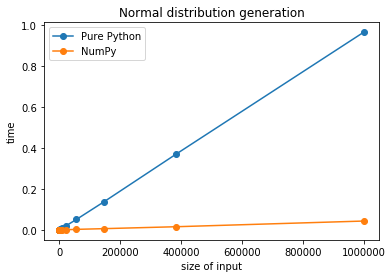

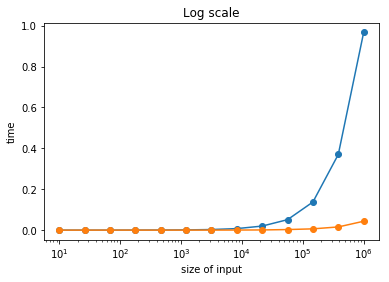

In [14]:
#             PurePy vs NumPy
# Task 0: _Нормальное распределение_
# Первым(нулевым) шагом хочется выяснить с помощью чего генерировать случайные числа быстрее

import random

def np_normal_gaus(n):
    return np.random.normal(0, 1, n)

def pp_normal_gaus(n):
    return [random.gauss(0, 1) for _ in range(n)]

timings_and_plot(pp_normal_gaus, np_normal_gaus, lambda n: (n,), title="Normal distribution generation")

# Работает за другое О-большое? Но кажется, что работает за другую константу, которая много меньше purepy-const

_Вывод 0_: Случаные распределения быстрее генерирует NumPy, в дальнейшем будем его и использовать для данной задачи.

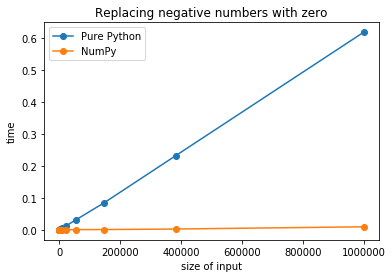

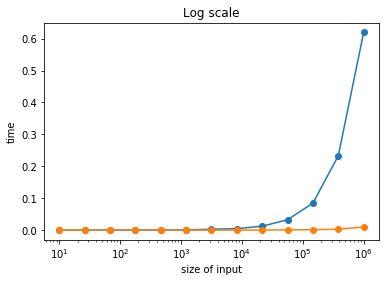

In [15]:
#             PurePy vs NumPy
# Task 1: _Удаление отрицательных чисел из распределение_
# Постановка: на вход подается массив, необходимо вместо отрицательных чисел написать нули.

def np_wo_negative(vec):
    return np.where(vec < 0, 0, vec)

def pp_wo_negative(vec):
    return [max(x, 0) for x in vec]

timings_and_plot(pp_wo_negative, np_wo_negative, lambda n: (np.random.normal(0, 1, n),),
                 title="Replacing negative numbers with zero")

# Работает за другое О-большое

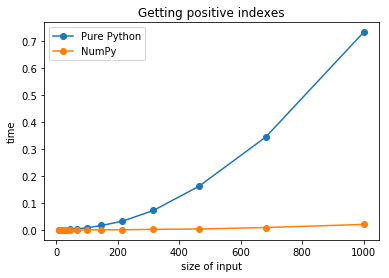

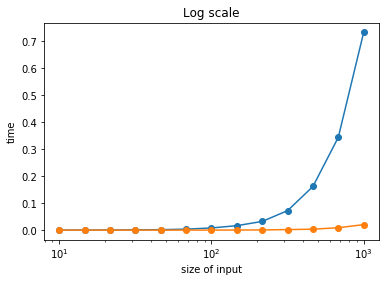

In [16]:
#             PurePy vs NumPy
# Task 2: _Удаление отрицательных чисел из распределение_
# Постановка: на вход подается массив, необходимо вместо отрицательных чисел написать нули.

def np_positive_indexes(matr):
    return np.argwhere(matr > 0)

def pp_positive_indexes(matr):
    ans = []
    for i in range(len(matr)):
        for j in range(len(matr)):
            if matr[i][j] > 0:
                ans.append([i, j])
    return ans

timings_and_plot(pp_positive_indexes, np_positive_indexes, 
                 lambda n: (np.random.normal(0, 1, n*n).reshape((n,n)),),
                 title="Getting positive indexes", high=3)
# O(n^2) => (10^3)^2
# Работает за другое О-большое

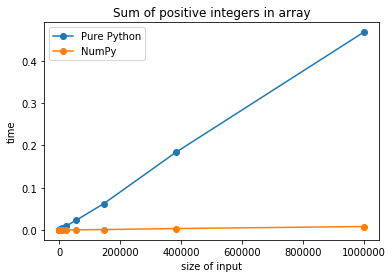

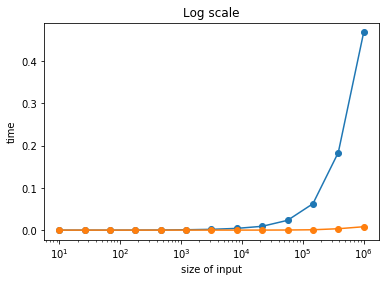

In [17]:
#             PurePy vs NumPy
# Task 3: _Сумма квадратов положительных элементов_
# Постановка: на вход подается массив, необходимо взять сумму квадратов всех его положительных элементов.

def np_positive_sum(arr):
    return np.sum(np.square(np.where(arr < 0, 0, arr)))

def pp_positive_sum(arr):
    return sum([a*a for a in arr if a > 0])


timings_and_plot(pp_positive_sum, np_positive_sum, 
                 lambda n: (np.random.randint(0, 10**3, n), ),
                 title="Sum of positive integers in array")

# Работает за другое О-большое

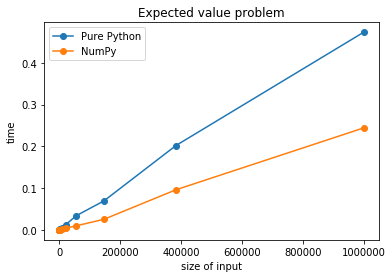

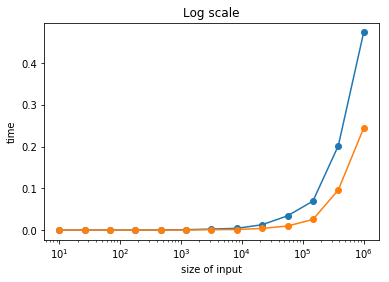

In [18]:
#             PurePy vs NumPy
# Task 4: _Математическое ожидание_
# Постановка: на вход подается массив вероятностей, необходимо взять сумму его элементов умноженных на индекс, т.е. мат.ожидание.

def np_expected_reward(prob_arr):
    return prob_arr.dot(np.array(range(len(prob_arr))))

def pp_expected_reward(prob_arr):
    ans = 0
    for p in range(len(prob_arr)):
        ans += p*prob_arr[p]
    return ans

timings_and_plot(pp_expected_reward, np_expected_reward, 
                 lambda n: (np.random.normal(0, 1, n), ), # тут мог быть бы более умный генератор, который проверял бы что сумма всех вероятностей единица и прочее,
                                                          # но нас интересует время работы от длины входа, поэтому можем использовать вот такую глупую" версию
                 title="Expected value problem")

# Работает за меньшую константу!

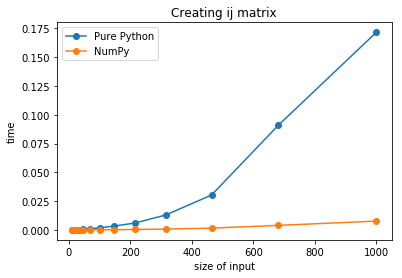

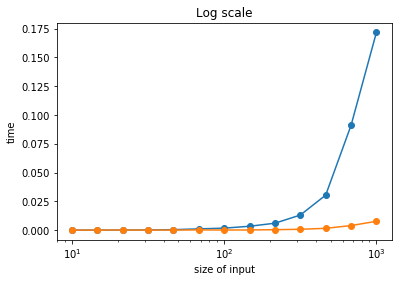

In [19]:
#             PurePy vs NumPy
# Task 5: _Создание ij-матрицы_
# Постановка: на вход число, необходимо создать матрицу M n*n такую, что M_ij = i*j

def np_create_ij(n):
    a = np.array(range(n)).reshape(1, -1)
    return a.T.dot(a)

def pp_create_ij(n):
    arr = []
    for i in range(n):
        row = []
        for j in range(n):
            row.append(i*j)
        arr.append(row)
    return arr

timings_and_plot(pp_create_ij, np_create_ij, 
                 lambda n: (n, ),
                 title="Creating ij matrix", high=3)

# Работает за меньшую константу!

__Вывод__: NumPy > PurePy
 1. Легко можно видеть, что время работы для "чистого" python'а увеличивается линейно от увеличения входа, в то время как у numpy время работы составляет примерно одно и тоже, независимо от длины входа, и, быть может, начинается увеличиваться после $10^6$.
 2. Здесь можно увидеть ситуацию аналогичную предыдущему пункту, но в этот раз numpy начинает увеливать время около $10^3$.
 3. Ситуация абсолютно аналогичная первой, что в очередной раз подтверждает, что numpy справляется быстрее.
 4. Как видно из графика, сложность работы в данном случае у numpy отлична от постоянной, но всё ещё остается быстрее чем чистый питон. То есть, получается, что асимптотика работы у двух подходов примерно одинаковая, но константа работы у numpy меньше, что делает решение задачи быстрее.
 5. Очередное подтверждение быстроты numpy на фоне чистого питона. 
Общий вывод -- __numpy работает быстрее чем чистый python__.
 
 
 


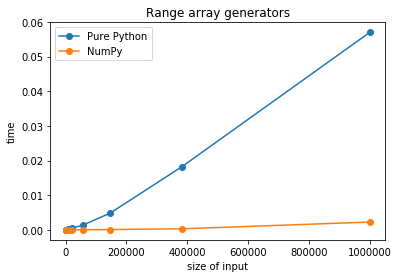

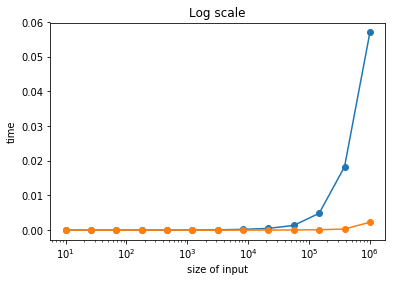

goin' forward


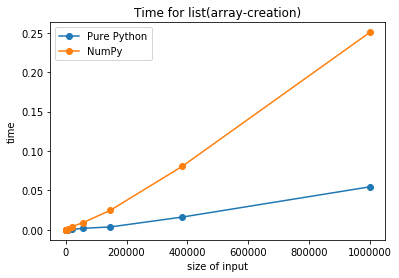

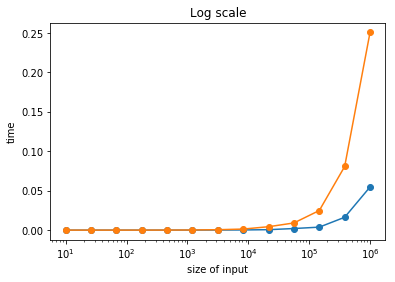

In [20]:
#             PurePy vs NumPy
# Task 5.5: _Создание последовательного массива длины n_
# Постановка: на вход число, последовательный массив длины n
# Замечание: В процессе решения _задания 4_ у меня возник что лучше: использовать range() или np.arrange().
# кажется очевидным, что np.arrange лучше, но хочется понять насколько он лучше.


timings_and_plot(
    lambda m: list(range(m)),
    lambda k: np.arange(k),
    lambda n: (n, ),
    title='Range array generators',
    high=6,
    number=100,
    )

# ЧТО? Шок-контент... NumPy создает range дольше!
print('goin\' forward')

timings_and_plot(
    lambda m: list(range(m)),
    lambda k: np.array(range(k)),
    lambda n: (n, ),
    title='Time for list(array-creation)',
    high=6,
    number=10,
    )

### Part 3. Pandas.

Задания 13-22 оцениваются в 0.4 баллов.  В заданиях 13-22 запрещается пользоваться циклами `for` и `while` в сдаваемом вами коде. Задания 13-15 также сдаются в контест с компилятором python3.6+numpy+pandas. В конце сдаваемого вами файла должны быть строки
```
import sys
exec(sys.stdin.read())
```

In [21]:
import pandas as pd

__Задание 13__, Дан датафрейм, в котором существует колонка 'email' (строка, длиной не более 255). Напишите функцию, которая в заданном датафрейме заменяет все невалидные email'ы на "unknown@unknown.com". Валидным сичтается емэйл, выглядящий как `[name]@[subdomain].[domain]`, где `[name]` -- строка, содержащая латинский буквы, точки и знаки `-` и `_`, `[subdomain]` и `[domain]` -- строки, содержащие только латинские буквы и цифры. Длина строки `[domain]` -- не больше 8 символов.

__Хинт__. Вопспользуйтесь методом .apply(), в который передайте функцию для обрабоки одного email'a.


__Ссылка на посылку в контесте:__ https://contest.yandex.ru/contest/16930/run-report/30641895/

In [22]:
import re

def reset_emails(df: pd.DataFrame) -> pd.DataFrame:
    df['email'] = df['email'].apply( lambda e: validate(e) )
    return df

def validate(e):
    if bool( re.search('^[\w\.\-]+\@[a-zA-Z0-9]+\.[a-zA-Z0-9]{,8}$', e) ):
        return e
    else:
        return "unknown@unknown.com"

# r'^[\w\.\-]+\@ [a-zA-Z0-9]+ \. [a-zA-Z0-9]{,8}$ -- соответсвие регулярному выражению
# ^ -- начало
# [\w\.\-]+ -- любое из: \w -- буквы, цифры и _; \. -- точка; \- -- черточка. + -- хотяб одно [name]
# \@ -- будет собачка @
# [a-zA-Z0-9]+ -- латинские и цифры, хотяб одно [subdomain]
# \. -- точка .
# [a-zA-Z0-9]{,8} -- неболее 8 букв или/и цифр [domain]
# $ -- конец строки
# https://www.geeksforgeeks.org/regular-expression-python-examples-set-1/

import sys
exec(sys.stdin.read())

# df = pd.DataFrame({
#     'email': [
#         "qwe@rty.ru", "asd@fg.gg", "unknown@unknown.com", "alex.k-_12"
#     ],
#     'income': [5.5, 6.5, 7.2, 8.2]
# })
# print(
#     reset_emails(df)
# )
# **LINK** `https://contest.yandex.ru/contest/16930/run-report/30641895/`

__Задание 14__. Дан датафрейм, в котором существуют колонки `age` (возраст в годах, целое число) и `income` (дробное число). Напишите функцию, которая вернёт средний заработок людей младше 18 лет.

__Ссылка на посылку в контесте:__ https://contest.yandex.ru/contest/16930/run-report/30639732/

In [23]:
def get_mean_income(df: pd.DataFrame) -> float:
    return df[df['age'] < 18]['income'].mean()

import sys
exec(sys.stdin.read())

# df = pd.DataFrame({
#     'age': [10, 15, 20, 25, 18, 100],
#     'income': [5.5, 6.5, 7.2, 8.2, 8, 1000]
# })
# print(df[df['age'] < 18]['income'].mean())
# print( df[ df['age'] < 18 ].mean()['income'] )
# print(get_mean_income(df))
# **LINK** `https://contest.yandex.ru/contest/16930/run-report/30639732/`

__Задание 15__. Дан датафрейм, в котором существуют колонки 'id' (идентификатор пользователя, целое положительное число), 'age' (возвраст в годах, целое число), 'sex' (пол пользователя, строка, равная либо "Male", либо "Female", либо "Other"), "favorite_color" (любимый цвет пользователя, строка длиной не более 255). Найдите число различных любимых цветов у женщин младше 18 лет.

__Ссылка на посылку в контесте__: https://contest.yandex.ru/contest/16930/run-report/30640055/

In [24]:
def get_fav_color(df: pd.DataFrame) -> int:
    return df[
         ( df['sex'] == 'Female' ) & ( df['age'] < 18 )
    ]['favorite_color'].nunique()

import sys
exec(sys.stdin.read())

# df = pd.DataFrame({
#     'id': [10, 15, 20, 25, 18, 100, 11, 5, 21, 35, 28, 110],
#     'age': [10, 12, 14, 15, 22, 22, 10, 12, 14, 15, 22, 22],
#     'sex': ['Male', 'Female', 'Other', 'Female', 'Female', 'Male', 'Male', 'Female', 'Other', 'Female', 'Female', 'Male'],
#     'favorite_color': [5.5, 6.5, 7.2, 8.2, 8, 250, 5.5, 6.5, 7.2, 8.2, 8, 250]
# })
# print(get_fav_color(df))
# **LINK** `https://contest.yandex.ru/contest/16930/run-report/30640055/`

### Part 4. EDA with pandas.

В этом задании предлагается сделать разведочный анализ данных в датафрейме. 

Мы будем работать с датасетом русскоязычных твитов. Скачайте данные по ссылке: https://www.dropbox.com/s/ou55qwyhbj1pdav/tweets.csv?dl=1

Корпус состоит из 12 столбцов:

    – id: уникальный номер сообщения в системе twitter;
    – tdate: дата публикации сообщения (твита);
    – tmane: имя пользователя, опубликовавшего сообщение;
    – ttext:  текст сообщения (твита);
    – ttype: поле в котором в дальнейшем будет указано к кому классу относится твит (положительный, отрицательный, нейтральный);
    – trep: количество реплаев к данному сообщению. В настоящий момент API твиттера не отдает эту информацию;
    – tfav: число сколько раз данное сообщение было добавлено в избранное другими пользователями;
    – tstcount: число всех сообщений пользователя в сети twitter;
    – tfol: количество фолловеров пользователя (тех людей, которые читают пользователя);
    – tfrien: количество друзей пользователя (те люди, которых читает пользователь);
    – listcount: количество листов-подписок в которые добавлен твиттер-пользователь.


In [25]:
# # For linux/google colab users -- download directly from the notebook
# ! wget -O tweets.csv https://www.dropbox.com/s/ou55qwyhbj1pdav/tweets.csv?dl=1 

In [26]:
df = pd.read_csv("data/tweets.csv")

In [27]:
df.head()

,id,tdate,tmane,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount
0,410745723928731648,1386764386,chavdaridi,RT @dianochka6464ru: Россия отмочила! Смотреть...,1,0,1,0,285,11,11
1,409580147185315840,1386486491,pifelanybal,Google сменил алгоритм чексуммы в загребании P...,-1,0,0,0,130,100,86
2,419794699738570752,1388921830,RomanenkoJulya,"мне надо домой, @RomaRudenko1 не отпускает(",-1,0,0,0,730,28,18
3,410625694087909376,1386735769,VizivayuDyavola,"RT @boobear1236969: Линта,я слева:D http://t.c...",1,0,3,0,1959,405,537
4,410849586635628545,1386789149,Den_Byhovsky,"@juliasvirid17 я имел ввиду, что для меня спос...",1,0,0,0,3248,61,48


__Задание 16__. Создайте колонку 'tdif', равную разнице числа друзей и числа фолловеров у пользователя.

In [28]:
df['tdif'] = df['tfol'] - df['tfrien']
df.head()

,id,tdate,tmane,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount,tdif
0,410745723928731648,1386764386,chavdaridi,RT @dianochka6464ru: Россия отмочила! Смотреть...,1,0,1,0,285,11,11,274
1,409580147185315840,1386486491,pifelanybal,Google сменил алгоритм чексуммы в загребании P...,-1,0,0,0,130,100,86,30
2,419794699738570752,1388921830,RomanenkoJulya,"мне надо домой, @RomaRudenko1 не отпускает(",-1,0,0,0,730,28,18,702
3,410625694087909376,1386735769,VizivayuDyavola,"RT @boobear1236969: Линта,я слева:D http://t.c...",1,0,3,0,1959,405,537,1554
4,410849586635628545,1386789149,Den_Byhovsky,"@juliasvirid17 я имел ввиду, что для меня спос...",1,0,0,0,3248,61,48,3187


__Задание 16__. Создайте датафрейм, в котором остались только строки с чётными номерами, и пронумеруйте их начиная с 0.

In [29]:
evendf = df[::2].reset_index().rename( columns={'index':'old_index'} )
evendf.head()
# .rename (нужно лишь для себя, чтоб увидеть, что индексы действительно только четные взялись)
# если что уберём с помощью .drop

,old_index,id,tdate,tmane,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount,tdif
0,0,410745723928731648,1386764386,chavdaridi,RT @dianochka6464ru: Россия отмочила! Смотреть...,1,0,1,0,285,11,11,274
1,2,419794699738570752,1388921830,RomanenkoJulya,"мне надо домой, @RomaRudenko1 не отпускает(",-1,0,0,0,730,28,18,702
2,4,410849586635628545,1386789149,Den_Byhovsky,"@juliasvirid17 я имел ввиду, что для меня спос...",1,0,0,0,3248,61,48,3187
3,6,415545552320077824,1387908754,VitaVita52,"Было неожиданно,все попадали на концерте,никог...",-1,0,0,0,461,16,19,445
4,8,413821842823348224,1387497790,wyhuzezyg,RT @yvysogoga: мда. центос это стабильность......,-1,0,3,0,641,385,386,256


__Задание 17__. Создайте датафрейм, в котором остались лишь твиты положительной тональности.

In [30]:
df_positive = df[ df['ttype'] > 0]
df_positive.head()

,id,tdate,tmane,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount,tdif
0,410745723928731648,1386764386,chavdaridi,RT @dianochka6464ru: Россия отмочила! Смотреть...,1,0,1,0,285,11,11,274
3,410625694087909376,1386735769,VizivayuDyavola,"RT @boobear1236969: Линта,я слева:D http://t.c...",1,0,3,0,1959,405,537,1554
4,410849586635628545,1386789149,Den_Byhovsky,"@juliasvirid17 я имел ввиду, что для меня спос...",1,0,0,0,3248,61,48,3187
15,411098495815131136,1386848494,KlimMasha,как всегда круто посидели на химии:) http://t....,1,0,0,0,583,22,37,561
17,410406761066405888,1386683571,Alexandrovna_07,"Сегодняшнее творение ,больше половины уже нет ...",1,0,0,0,1155,24,20,1131


__Задание 18__. Посчитайте число уникальных пользователей (пользователей с различными tmane).

__Хинт__: воспользуйтесь np.unique.

In [31]:
count_unique_users = df['tmane'].nunique()
print(count_unique_users)

139658


__Задание 19__. Посчитайте основные статистики по числу подписчиков при помощи метода .describe(). Постройте гистограмму значений признака.

count    2.268340e+05
mean     7.584972e+03
std      2.039972e+04
min      0.000000e+00
25%      4.730000e+02
50%      2.026000e+03
75%      7.562000e+03
max      1.138639e+06
Name: tfol, dtype: float64


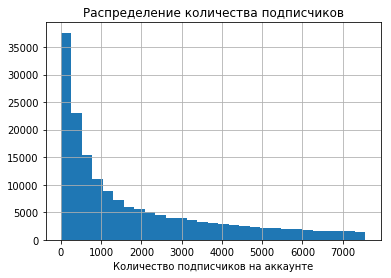

In [32]:
descr = df['tfol'].describe()
print(descr)

ax = plt.gca()
ax.set_title('Распределение количества подписчиков')
ax.set_xlabel('Количество подписчиков на аккаунте')
df['tfol'].hist(
    bins=int(descr['count']//descr['mean']), 
    range=(descr['min'], descr['75%']),
#     column='tfol',
    ax=ax
)

__Задание 20__. Посчитайте число ретвитов в датасете (твитов, начинающихся с "RT @").

In [33]:
df_retweets = df[ df['ttext'].str.startswith('RT @', na=False) ] # All retweets (более объемлимо чем просто число ретвитов!)
print(len(df_retweets))

36462


__Задание 21__. Назовём длинным такой твит, что его длина больше, чем не менее 80% всех твитов. Найдите число длинных твитов.

In [34]:
q_len = df['ttext'].apply(len).quantile(q=0.8)
df_longtweets = df[ df['ttext'].apply(len) > q_len ]
print(len(df_longtweets))

45081


__Задание 22__. Постройте гистограмму распределения числа твитов по месяцам. В какой месяц какого года было опубликовано больше всего твитов?

__Хинт__: Время в колонке tdate -- это Unix time, и оно отображает то, сколько секунд прошло с 00:00:00 1 января 1970 года. Для конвертации этого времени в удобный формат воспользуйтесь библиотекой `datetime`.

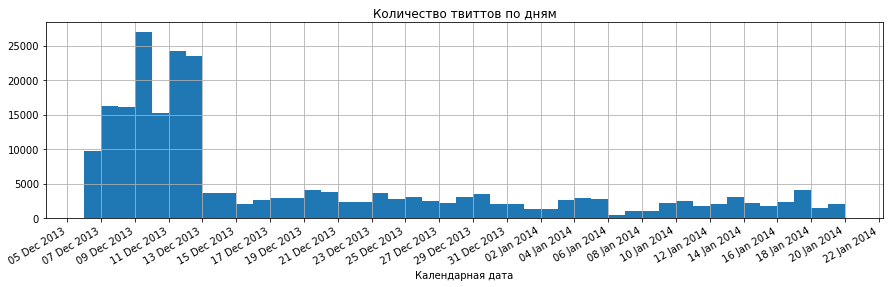

In [36]:
import matplotlib.dates as mdates

date_df = df[['tdate']].copy()
date_df['date'] = pd.to_datetime(date_df['tdate'], unit='s').dt.normalize()
date_df['date'] = date_df['date'].astype("datetime64")

#plot data
fig, ax = plt.subplots(figsize=(15,4))
fig.autofmt_xdate()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))
ax.set_title('Количество твиттов по дням')
ax.set_xlabel('Календарная дата')
date_df['date'].hist(ax=ax, bins=(date_df['date'].max() - date_df['date'].min()).days)


# https://stackoverflow.com/questions/38228995/how-can-i-draw-the-histogram-of-date-values-group-by-month-in-each-year-in-pytho
# https://scentellegher.github.io/programming/2017/05/24/pandas-bar-plot-with-formatted-dates.html

__Вывод__: Из распределения выше можно понять несколько вещей, а также попробовать их объяснить.
1) Во-первых, отвечая на вопрос задания, больше всего твиттов было опубликовано в декабре месяце.
2) Во-вторых, как мы видимо пик пришелся на первую половину декабря.
Это можно объяснить тем, что именно в то время [_начался Майдан_](https://censor.net.ua/photo_news/316008/11_dekabrya_2013_goda_osobennaya_data_v_tu_noch_mayidan_vstal_na_put_borby_i_stalo_yasno_chto_pobeda), а т.к. данная выборка по ру-твиттеру, очевидно, что именно в тот момент времени пользователи были наиболее активны.
3) В-третьих, Новый год (т.е. 1ое января), ровно как и рождество (26 декабря или 6 января) не вызывает ажиотажа, который можно было бы предположить

PS: Можно попробовать выкинуть первую половину декабря и попробовать соотнести количество твиттов с [событиями декабря-января](https://ru.wikipedia.org/wiki/Декабрь_2013_года), но проделывать такой анализ в 2к20, мне кажется, нерелевантным.

Наиболее интересное явление на данном графике -- корреляция событий начала декабря и политических событий, на фоне всего остального.

__Задание 23__. Вставьте ниже смешную картинку, желательно про машинное обучение. Лучшие картинки мы наградим бонусными баллами (но это не точно).

   ![The meme](https://i.imgur.com/BE3w9mu.jpg)


( мемы про PyTorch не завезли :с )

__Задание 999__. Напишите ниже, чего вы ждёте от курса, какой формат лекций и семинаров вам более интересен, в какие дни хотели бы поставить семинары, темы, которые хотели бы изучить, промежуточный фидбек (при наличии), а также произвольные пожелания и предложения. Мы постараемся всё это учесть.
